<a href="https://colab.research.google.com/github/iubordei/Ahorcado/blob/master/2_Ampliacion_Medir_Tiempo_Entrenamiento_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Librerías**

In [1]:
!pip install fastai --upgrade
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

     |████████████████████████████████| 194kB 19.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 12.8MB 298kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


###**Dataset**

El dataset utilizado es el de piezas de ajedrez, disponible en [Kaggle](https://www.kaggle.com/niteshfre/chessman-image-dataset)

In [2]:
!wget https://www.dropbox.com/s/l6tnfgc39t2qym5/IA_entregable_2.zip?dl=1 -O IA_entregable_2.zip
!unzip IA_entregable_2.zip

--2021-05-01 17:22:05--  https://www.dropbox.com/s/l6tnfgc39t2qym5/IA_entregable_2.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/l6tnfgc39t2qym5/IA_entregable_2.zip [following]
--2021-05-01 17:22:05--  https://www.dropbox.com/s/dl/l6tnfgc39t2qym5/IA_entregable_2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdced67d426a4d5e89fe1684925.dl.dropboxusercontent.com/cd/0/get/BNq08LSa_pAZM6n4ICH5aazcPUZQTrMUe5kcmNO4kikaPboF3Trt3ZgGly0lsW-NQjJe09z_Cq-ZNU1Pg54hzedqL8kxYSb2aTrJSlyqfnQ_gJJyakqe2x0jeEdLFyYUbEMbTURZzjakKKZsWygAJYar/file?dl=1# [following]
--2021-05-01 17:22:06--  https://ucdced67d426a4d5e89fe1684925.dl.dropboxusercontent.com/cd/0/get/BNq08LSa_pAZM6n4ICH5aazcPUZQTrMUe5kcmNO4kikaPboF3Trt3ZgGly0lsW-NQjJ

**Crear directorios**

In [3]:
path = Path('data/chess')

In [4]:
# bishop
folder = 'Bishop'
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
# king
folder = 'King'
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
# knight
folder = 'Knight'
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
# pawn
folder = 'Pawn'
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
# queen
folder = 'Queen'
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
# rook
folder = 'Rook'
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
# Carpetas para el conjunto de entrenamiento
(path/'train/bishop').mkdir(parents=True, exist_ok=True)
(path/'train/king'  ).mkdir(parents=True, exist_ok=True)
(path/'train/knight').mkdir(parents=True, exist_ok=True)
(path/'train/pawn'  ).mkdir(parents=True, exist_ok=True)
(path/'train/queen' ).mkdir(parents=True, exist_ok=True)
(path/'train/rook'  ).mkdir(parents=True, exist_ok=True)

In [11]:
# Carpetas para el conjunto de test
(path/'test/bishop').mkdir(parents=True, exist_ok=True)
(path/'test/king'  ).mkdir(parents=True, exist_ok=True)
(path/'test/knight').mkdir(parents=True, exist_ok=True)
(path/'test/pawn'  ).mkdir(parents=True, exist_ok=True)
(path/'test/queen' ).mkdir(parents=True, exist_ok=True)
(path/'test/rook'  ).mkdir(parents=True, exist_ok=True)

**Separación del dataset en conjunto de entrenamiento y de test**

In [12]:
trainBishop, testBishop = train_test_split(get_image_files(path/'Bishop'), test_size=0.2, random_state=15)
trainKing,   testKing   = train_test_split(get_image_files(path/'King'),   test_size=0.2, random_state=15)
trainKnight, testKnight = train_test_split(get_image_files(path/'Knight'), test_size=0.2, random_state=15)
trainPawn,   testPawn   = train_test_split(get_image_files(path/'Pawn'),   test_size=0.2, random_state=15)
trainQueen,  testQueen  = train_test_split(get_image_files(path/'Queen'),  test_size=0.2, random_state=15)
trainRook,   testRook   = train_test_split(get_image_files(path/'Rook'),   test_size=0.2, random_state=15)

In [13]:
# Mover imágenes del conjunto de entrenamiento a las carpetas correspondientes
for x in trainBishop:
    shutil.move(str(x), path/('train/bishop/'+ x.name))

for x in trainKing:
    shutil.move(str(x), path/('train/king/'+ x.name))

for x in trainKnight:
    shutil.move(str(x), path/('train/knight/'+ x.name))

for x in trainPawn:
    shutil.move(str(x), path/('train/pawn/'+ x.name))

for x in trainQueen:
    shutil.move(str(x), path/('train/queen/'+ x.name))

for x in trainRook:
    shutil.move(str(x), path/('train/rook/'+ x.name))

In [14]:
# Mover imágenes del conjunto de test a las carpetas correspondientes
for x in testBishop:
    shutil.move(str(x), path/('test/bishop/'+ x.name))

for x in testKing:
    shutil.move(str(x), path/('test/king/'+ x.name))

for x in testKnight:
    shutil.move(str(x), path/('test/knight/'+ x.name))

for x in testPawn:
    shutil.move(str(x), path/('test/pawn/'+ x.name))

for x in testQueen:
    shutil.move(str(x), path/('test/queen/'+ x.name))

for x in testRook:
    shutil.move(str(x), path/('test/rook/'+ x.name))

In [15]:
# Eliminar directorios innecesarios
shutil.rmtree('data/chess/Bishop')
shutil.rmtree('data/chess/King')
shutil.rmtree('data/chess/Knight')
shutil.rmtree('data/chess/Pawn')
shutil.rmtree('data/chess/Queen')
shutil.rmtree('data/chess/Rook')

**Cargar el dataset**

In [16]:
# DataBlock
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                         get_items=get_image_files, 
                         splitter=RandomSplitter(valid_pct=0.2,seed=42),
                         get_y=parent_label,
                         item_tfms = Resize(512),
                         batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [17]:
# DataLoader
trainPath = Path('data/chess/train')
dls = db.dataloaders(trainPath, bs=128)

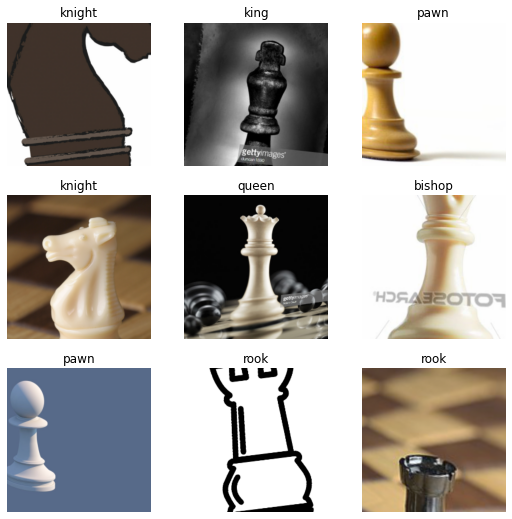

In [18]:
# Mostrar un batch del DataLoader
dls.show_batch()

###**Crear modelo de predicción**

In [19]:
# Red convolucional usando transfer learning, con arquitectura base ResNet 34
learn = cnn_learner(dls, resnet18, metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


**Entrenar modelo**

In [20]:
%%time
learn.fine_tune(10, base_lr=1e-3)

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,3.007907,2.919354,0.183908,01:33


epoch,train_loss,valid_loss,accuracy,time
0,2.873482,2.459308,0.218391,01:58
1,2.708069,2.174348,0.241379,01:59
2,2.710396,1.928480,0.275862,01:58
3,2.582939,1.690697,0.344828,01:58
4,2.389281,1.477603,0.448276,01:58
5,2.226012,1.319066,0.517241,01:58
6,2.088891,1.223410,0.563218,01:58
7,1.964954,1.173324,0.632184,01:58
8,1.875812,1.158887,0.620690,01:58
9,1.784381,1.161129,0.597701,01:58


CPU times: user 18min 34s, sys: 1min 12s, total: 19min 46s
Wall time: 21min 20s


Tiempo: 21 min 20 segundos (solo se muetra una ejecución, la ejecución de múltiples pasadas es demasiado costosa).

La diferencia de tiempos es muy siginificativa entre el uso de CPU y GPU, (con GPU 1 minuto 49 segundos), siendo cerca de 12 veces superior el uso de CPU al de GPU.